In [3]:
import numpy as np
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import random

In [42]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [76]:
def sampling1dim(num,mean,sig):
    
    samples = []

    while(len(samples) < num):
        rangemin = mean - (3 * sig)
        rangemax = mean + (3 * sig)
        newsample = random.uniform(rangemin,rangemax)
        distribution = gaussian(newsample,mean,sig)
        ran = random.random()
        
        if(ran<distribution):
            samples.append(newsample)
    return samples

In [77]:
def sampling2dim(num,mean,sig):
    
    x = []
    y = []
    
    while(len(x) < num):
        
        x1 = mean[0] - (3*sig)
        x2 = mean[0] + (3*sig)
        y1 = mean[1] - (3*sig)
        y2 = mean[1] + (3*sig)
        
        newx = random.uniform(x1,x2)
        newy = random.uniform(y1,y2)
        newz = multivariate_normal.pdf([newx, newy], mean, sig)
        randomy = random.random()
        
        if(randomy<newz):
            x.append(newx)
            y.append(newy)
    return x, y

In [82]:
def uniform1d(min1, max1, sample):
    samples = []
    
    while(len(samples)<sample):
        
        rand=random.random()
        
        newy=random.uniform(min1,max1)
        
        if(rand<newy):
            samples.append(newy)
    
    return samples

def StMethod(num, samples):
    
    rand = []
    
    for i in range(num):
        r = random.random()
        rand.append(r)
        
    sum1 = sum(rand)
    randlist = []
    
    for i in rand:
        randlist.append(i/sum1)
        
    sample = np.random.choice(num, samples, p=randlist)
    
    return sample

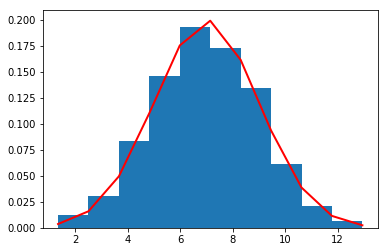

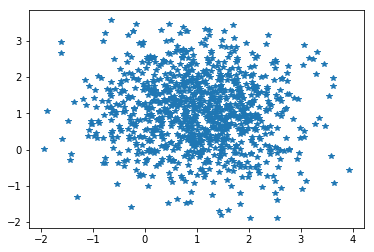

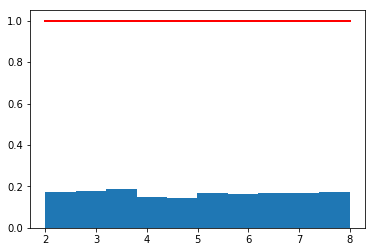

In [92]:
sig = 2
mean = 7
array = sampling1dim(1000, mu, sigma)
x, y = sampling2dim(1000, [1, 1], [[1, 0], [0, 1]])

count, histbins, ignored = plt.hist(array, 10, normed=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.plot(histbins, 1/(sig * np.sqrt(2 * np.pi)) * np.exp( - (histbins - mu)**2 /(2*sig**2) ), linewidth=2, color='r')
plt.show()
plt.plot(x, y,'*')
plt.show()

array = one_d_uniform(2, 8, 1000)
count, histbins, ignored = plt.hist(array, 10, normed=True)
plt.plot(histbins , np.ones_like(histbins), linewidth=2, color='r')
plt.show()

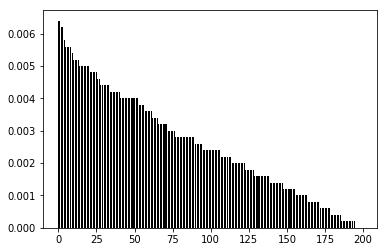

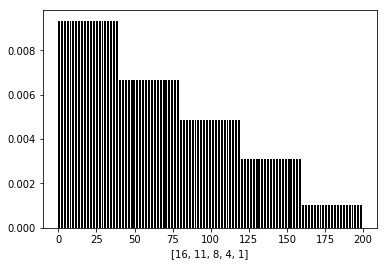

In [89]:
vals = StMethod(400, 5000).tolist()

valcs=[]
for x in range(200):
    valcs.append([x,vals.count(x)*1.0/len(vals)])

valcs.sort(key=lambda x:x[1], reverse=True)

_,templist2 = zip(*valcs)

N = len(templist2)
range1 = range(N)
width = 1/1.5
plt.bar(range1, templist2, width, color='black')
plt.show()

avgs = []

size = 40
avgarray = []

for i in range(0, len(templist2), size):
    
    sub_array = templist2[i:i+chunk_size]
    
    avgs.append(sum(sub_array))
    
    avg = sum(sub_array)/len(sub_array)
    temparray = []
    
    for _ in range(size):
        temparray.append(avg)
        
    avgarray.extend(temparray)

avgarr = []

for i in range(len(averages)):
    avgarr.append(sum(averages[:i+1]))
    
counts = []

for _ in range(5):
    counts.append(0) 

for i in range(size):
    rand = random.random()
    indexselect = next(y[0] for y in enumerate(avgarr) if y[1] > rand)
    counts[indexselect] = counts[indexselect] + 1

N = len(avgarray)
x = range(N)
plt.bar(x, average_array, width, color='black')
plt.xlabel(counts)
plt.show()